In [31]:
from pyuvdata import UVData
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import time

In [2]:
rawpath = '/lustre/aoc/projects/hera/H1C_IDR2/2458098/'
rawfile = 'zen.2458098.16280.HH.uvh5'

In [34]:
# Get some data; this is raw data and we want to do it to the calibrated data, 
# but to test the subtraction, this will work
uvraw = UVData()
uvraw.read(rawpath+rawfile)

In [35]:
uvraw_avgsub = deepcopy(uvraw)

In [36]:
# Number of baselines
print(uvraw.Nbls)
# Number of baselines times times
print(uvraw.Nblts)
# Number of times
print(uvraw.Ntimes)

1378
82680
60


In [37]:
t0 = time.time()
# This is not going to do the write thing for autocorrelations ...
# Also gotta deal with flags ...
for ibl in np.arange(uvraw.Nbls):
    # Grab the data corresponding to that baseline
    wf = uvraw.data_array[np.arange(ibl,uvraw.Nblts,uvraw.Nbls),0,:,:]
    # Calculate the average for each of the four polarized coherencies
    wfavg = np.mean(wf,axis=0)
    for istokes in np.arange(4):
        wf[:,:,istokes] -= wfavg[:,istokes]
    uvraw_avgsub.data_array[np.arange(ibl,uvraw.Nblts,uvraw.Nbls),0,:,:] = wf
t1 = time.time()
print(t1-t0)

4.503624677658081


In [41]:
# Did it work?  Let's select a single baseline and see ...
bl = (52,53,'xx')
bl_raw = uvraw.select(bls=bl,inplace=False)
bl_raw_avgsub = uvraw_avgsub.select(bls=bl,inplace=False)

In [50]:
bl_raw_data = bl_raw.data_array.squeeze()
bl_raw_avgsub_data = bl_raw_avgsub.data_array.squeeze()

divide by zero encountered in log10


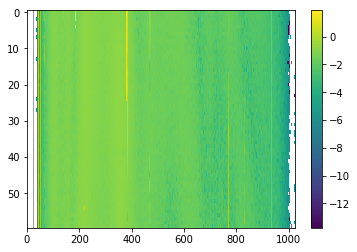

In [51]:
plt.imshow(np.log10(np.abs(bl_raw_data)),aspect='auto')
plt.colorbar()

divide by zero encountered in log10


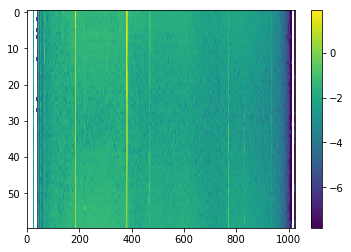

In [52]:
plt.imshow(np.log10(np.abs(bl_raw_avgsub_data)),aspect='auto')
plt.colorbar()

divide by zero encountered in log10


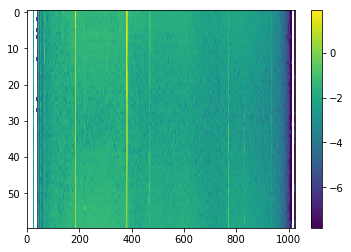

In [53]:
plt.imshow(np.log10(np.abs(bl_raw_data-bl_raw_data.mean(axis=0))),aspect='auto')
plt.colorbar()

In [54]:
test_avg = bl_raw_data-bl_raw_data.mean(axis=0)

In [55]:
print((bl_raw_avgsub_data - test_avg).min())

0j


In [56]:
print((bl_raw_avgsub_data - test_avg).max())

0j
